# SF Threshold

In [1]:
from To_sim.for_multi import get_r_sigma_Z
import numpy as np


from To_sim.for_multi import get_r_sigma_Z_MF
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt

import scipy.ndimage


N = 1000
omega = 1



In [5]:
m = 3
G = nx.barabasi_albert_graph(N,m,seed=0)
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_71970/2566090655.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [23]:
Gs = []
for i in range(10):
    G = nx.barabasi_albert_graph(N,m,seed=1)
    Gs.append(G)

In [24]:
A = nx.adjacency_matrix(Gs[0])
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_71970/656577331.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(Gs[0])


In [25]:
EDM_SET = {}

In [26]:
D = 0.0

In [27]:
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)
K = 5
db = 0.04
Ds = np.linspace(0,K*0.6,31)
# len(Ds), len(bs)
bs = np.linspace(0.9,1.1,11)

In [28]:
D = 0

In [ ]:
D += 0.3
print(D)

0.3


In [ ]:
seed = 0
np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)
D_rs = []
D_sigmas = []    
D_chis = []
for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=True, pm_processes=8):
    D_rs.append(r_m)
    D_sigmas.append(sigma)
    D_chis.append(chi)


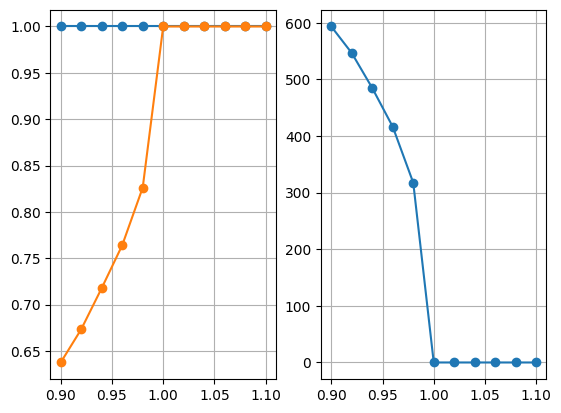

In [ ]:
plt.subplot(121)
plt.plot(bs,D_rs,'o-')
plt.plot(bs,D_sigmas,'o-')
plt.grid()
plt.subplot(122)
plt.plot(bs,D_chis,'o-')
plt.grid()

# plt.ylim(0,20)